# Pizza Place in Manhattan

## Rent Data
### Import libraries

In [1]:
import pandas as pd

### Create and import the CSV file into a dataframe

In [2]:
df = pd.read_csv (r'RentHop New York Two Bedroom Median Rent Affordability.csv', usecols=[0,1,2,3,4,5])
print (df)

                                 Neighborhood        Borough  \
0    Queensbridge-Ravenswood-Long Island City         Queens   
1                                Williamsburg       Brooklyn   
2                             Lower East Side      Manhattan   
3                      Mott Haven-Port Morris          Bronx   
4                           East Harlem North      Manhattan   
..                                        ...            ...   
134                     Bayside-Bayside Hills         Queens   
135                    New Dorp-Midland Beach  Staten Island   
136                                Whitestone         Queens   
137                               Great Kills  Staten Island   
138             Upper East Side-Carnegie Hill      Manhattan   

    Two-Bedroom Median Rent Median Household Income Income % for Median Rent  \
0                 $3,300.00                 $28,378                  139.54%   
1                 $2,499.00                 $21,502                  13

### Rename headers

In [3]:
df.rename(columns={'Two-Bedroom Median Rent':'Two-Bedroom Median Rent ($)',
                   'Median Household Income':'Median Household Income ($)',
                   'Income Required to Lease (40X Rule)':'Income Required to Lease (40X Rule)($)'
                   },
                   inplace=True)
print(df)

                                 Neighborhood        Borough  \
0    Queensbridge-Ravenswood-Long Island City         Queens   
1                                Williamsburg       Brooklyn   
2                             Lower East Side      Manhattan   
3                      Mott Haven-Port Morris          Bronx   
4                           East Harlem North      Manhattan   
..                                        ...            ...   
134                     Bayside-Bayside Hills         Queens   
135                    New Dorp-Midland Beach  Staten Island   
136                                Whitestone         Queens   
137                               Great Kills  Staten Island   
138             Upper East Side-Carnegie Hill      Manhattan   

    Two-Bedroom Median Rent ($) Median Household Income ($)  \
0                     $3,300.00                     $28,378   
1                     $2,499.00                     $21,502   
2                     $3,495.00           

### Declare column names as variables

In [4]:
nei = df['Neighborhood']
bor = df['Borough']
tbmr = df['Two-Bedroom Median Rent ($)']
mhi = df['Median Household Income ($)']
ipmr = df['Income % for Median Rent']
irl = df['Income Required to Lease (40X Rule)($)']

### Remove non-numerical characters from the data

In [5]:
df['Two-Bedroom Median Rent ($)'] = df['Two-Bedroom Median Rent ($)'].replace({'\$':'',',':''}, regex=True)
df['Median Household Income ($)'] = df['Median Household Income ($)'].replace({'\$':'',',':''}, regex=True)
df['Income Required to Lease (40X Rule)($)'] = df['Income Required to Lease (40X Rule)($)'].replace({'\$':'',',':''}, regex=True)
df['Income % for Median Rent'] = df['Income % for Median Rent'].replace({'%':''}, regex=True)
print(df)

                                 Neighborhood        Borough  \
0    Queensbridge-Ravenswood-Long Island City         Queens   
1                                Williamsburg       Brooklyn   
2                             Lower East Side      Manhattan   
3                      Mott Haven-Port Morris          Bronx   
4                           East Harlem North      Manhattan   
..                                        ...            ...   
134                     Bayside-Bayside Hills         Queens   
135                    New Dorp-Midland Beach  Staten Island   
136                                Whitestone         Queens   
137                               Great Kills  Staten Island   
138             Upper East Side-Carnegie Hill      Manhattan   

    Two-Bedroom Median Rent ($) Median Household Income ($)  \
0                       3300.00                       28378   
1                       2499.00                       21502   
2                       3495.00           

### Filter for Manhattan data

In [6]:
manhattan_rent_data = df[df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_rent_data.head()

,Neighborhood,Borough,Two-Bedroom Median Rent ($),Median Household Income ($),Income % for Median Rent,Income Required to Lease (40X Rule)($)
0,Lower East Side,Manhattan,3495.00,31273,134.11,139800
1,East Harlem North,Manhattan,2495.00,26099,114.72,99800
2,Chinatown,Manhattan,3391.00,35908,113.32,135640
3,Manhattanville,Manhattan,2550.00,29182,104.86,102000
4,East Harlem South,Manhattan,2850.00,35857,95.38,114000


In [7]:
print(manhattan_rent_data.shape)

(28, 6)


## Location and Venue Data

### Installing and Importing Libraries

In [8]:
!pip install beautifulsoup4
!pip install lxml

     |████████████████████████████████| 112kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 8.1MB/s eta 0:00:01     |█████████████████▉              | 3.2MB 8.1MB/s eta 0:00:01


In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge --no-deps altair --yes
!conda install -c conda-forge --no-deps vincent --yes

!conda install -c conda-forge geopy=1.19.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge --no-deps folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         614 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1



altair-4.1.0         | 614 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::altair==4.1.0=py_1
done

## Package Plan ##

  env

### Importing data into dataframe

In [10]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [11]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [12]:
neighborhoods_data = newyork_data['features']

In [13]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [14]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [15]:
manhattan_location_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_location_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


### Appending the dataframe with Rent data and tidying it up

In [16]:
df_outer = pd.merge(manhattan_location_data, manhattan_rent_data, on=['Neighborhood','Borough'], how='outer')
df_repeats = pd.concat([df_outer, df_outer.loc[[48],:], 
                       df_outer.loc[[48],:], 
                       df_outer.loc[[49],:],
                       df_outer.loc[[49],:],
                       df_outer.loc[[49],:],
                       df_outer.loc[[53],:],
                       df_outer.loc[[54],:],
                       df_outer.loc[[55],:],
                       df_outer.loc[[45],:]]).reset_index(drop=True)

df_renamed = df_repeats.copy()
df_renamed.at[48,'Neighborhood']= 'Hudson Yards'
df_renamed.at[56,'Neighborhood']= 'Chelsea'
df_renamed.at[57,'Neighborhood']= 'Flat Iron'

df_renamed.at[49,'Neighborhood']= 'Soho'
df_renamed.at[58,'Neighborhood']= 'Tribeca'
df_renamed.at[59,'Neighborhood']= 'Civic Center'
df_renamed.at[60,'Neighborhood']= 'Little Italy'

df_renamed.at[53,'Neighborhood']= 'Midtown'
df_renamed.at[61,'Neighborhood']= 'Midtown South'

df_renamed.at[54,'Neighborhood']= 'Lenox Hill'
df_renamed.at[62,'Neighborhood']= 'Roosevelt Island'

df_renamed.at[55,'Neighborhood']= 'Upper East Side'
df_renamed.at[63,'Neighborhood']= 'Carnegie Hill'

df_renamed.at[45,'Neighborhood']= 'Marble Hill'
df_renamed.at[64,'Neighborhood']= 'Inwood'

df_renamed.at[52,'Neighborhood']= 'Turtle Bay'
df_renamed.at[43,'Neighborhood']= 'Washington Heights'
df_renamed.at[46,'Neighborhood']= 'Washington Heights'
df_renamed.at[43,'Neighborhood']= 'Washington Heights'
df_renamed.at[51,'Neighborhood']= 'Murray Hill'
df_renamed.at[40,'Neighborhood']= 'East Harlem'
df_renamed.at[41,'Neighborhood']= 'East Harlem'
df_renamed.at[42,'Neighborhood']= 'Central Harlem'
df_renamed.at[44,'Neighborhood']= 'Central Harlem'
df_renamed.at[47,'Neighborhood']= 'Stuyvesant Town'
df_renamed.at[50,'Neighborhood']= 'Battery Park City'
df_renamed.at[38,'Neighborhood']= 'Flat Iron'

In [17]:
df_renamed[['Median Household Income ($)',
    'Income Required to Lease (40X Rule)($)',
    'Two-Bedroom Median Rent ($)', 
    'Income % for Median Rent']] = df_renamed[['Median Household Income ($)', 
                                       'Income Required to Lease (40X Rule)($)',
                                       'Two-Bedroom Median Rent ($)', 
                                       'Income % for Median Rent']].apply(pd.to_numeric) 

df_renamed.dtypes

Borough                                    object
Neighborhood                               object
Latitude                                  float64
Longitude                                 float64
Two-Bedroom Median Rent ($)               float64
Median Household Income ($)               float64
Income % for Median Rent                  float64
Income Required to Lease (40X Rule)($)    float64
dtype: object

In [18]:
df_matched = df_renamed.groupby('Neighborhood')[['Latitude', 
                                               'Longitude',
                                               'Two-Bedroom Median Rent ($)',  
                                               'Median Household Income ($)', 
                                               'Income % for Median Rent', 
                                               'Income Required to Lease (40X Rule)($)']].mean().reset_index()

manhattan_data = df_matched.dropna()
manhattan_data.set_index('Neighborhood').head()

,Latitude,Longitude,Two-Bedroom Median Rent ($),Median Household Income ($),Income % for Median Rent,Income Required to Lease (40X Rule)($)
Neighborhood,,,,,,
Battery Park City,40.711932,-74.016869,4552.5,125434.0,43.550,182100.0
Carnegie Hill,40.782683,-73.953256,3555.0,155213.0,27.480,142200.0
Central Harlem,40.815976,-73.943211,2650.0,41389.5,77.315,106000.0
Chelsea,40.744035,-74.003116,4304.0,101369.0,50.950,172160.0
Chinatown,40.715618,-73.994279,3391.0,35908.0,113.320,135640.0


### Discover the co-ordinates of Manhattan

In [19]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [20]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Battery Park City are 40.71193198394565, -74.01686930508617.


### Defining Foursquare Credentials and Version

In [21]:
CLIENT_ID = 'HPI1BQJXYUDINH0X25JPY4LAH3FZOXPBCSA5N5YOVVIGGK3Z' # your Foursquare ID
CLIENT_SECRET = '0NJPHV0YN5EXICPWW5LURPJCNBWKTSXSAWY5UDJKCWUCGLPV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HPI1BQJXYUDINH0X25JPY4LAH3FZOXPBCSA5N5YOVVIGGK3Z
CLIENT_SECRET:0NJPHV0YN5EXICPWW5LURPJCNBWKTSXSAWY5UDJKCWUCGLPV


### Extracting venue data via the Foursquare API

In [22]:
def getNearbyFood(names, latitudes, longitudes, radius=500, limit=100):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # Food category id
            limit)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            not_found += 1
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incomplete information.".format(not_found))
    
    return(nearby_venues)

In [23]:
manhattan_venues = getNearbyFood(names=manhattan_location_data['Neighborhood'],
                                   latitudes=manhattan_location_data['Latitude'],
                                   longitudes=manhattan_location_data['Longitude']
                                  )

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incomplete information.


In [24]:
manhattan_venues.shape

(2775, 7)

In [25]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
2,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
3,Marble Hill,40.876551,-73.91066,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant
4,Marble Hill,40.876551,-73.91066,Subway Sandwiches,40.874667,-73.909586,Sandwich Place


### Manipulating the data to find the top 5 venue types in each neighborhood

In [26]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Poutine Place,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Poutine Place,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Battery Park City,0.00,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000,0.000000,0.000000,0.038462,0.00,0.000000,0.00,0.076923,0.038462,0.000000,0.038462,0.000000,0.000000,0.00,0.000000,0.000000,0.076923,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.153846,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.038462,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
1,Carnegie Hill,0.00,0.000000,0.014493,0.000000,0.014493,0.000000,0.000000,0.00,0.000000,0.014493,0.086957,0.000000,0.000000,0.00,0.014493,0.00,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.00,0.000000,0.000000,0.014493,0.00,0.000000,0.00,0.014493,0.000000,0.028986,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.000000,0.000000,0.000000,0.028986,0.043478,0.000000,0.000000,0.000000,0.00,0.014493,0.000000,0.00,0.014493,0.000000,0.028986,0.000000,0.00,0.000000,0.057971,0.000000,0.043478,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.00,0.000000,0.014493,0.043478,0.000000,0.000000,0.000000,0.00,0.028986,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.115942,0.00

In [28]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Pizza Place  0.15
1  Italian Restaurant  0.12
2        Burger Joint  0.08
3          Food Court  0.08
4  Mexican Restaurant  0.08
5  Chinese Restaurant  0.08
6      Sandwich Place  0.08
7                Café  0.04
8          Donut Shop  0.04
9          Food Truck  0.04


----Carnegie Hill----
                     venue  freq
0              Pizza Place  0.12
1                     Café  0.09
2                   Bakery  0.09
3         Sushi Restaurant  0.07
4       Italian Restaurant  0.06
5       Mexican Restaurant  0.04
6        French Restaurant  0.04
7      Japanese Restaurant  0.04
8        Indian Restaurant  0.03
9  New American Restaurant  0.03


----Central Harlem----
                             venue  freq
0                    Deli / Bodega  0.09
1              Fried Chicken Joint  0.09
2               African Restaurant  0.07
3               Chinese Restaurant  0.07
4             Caribbean Restaurant  0.07
5  South

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Battery Park City,Pizza Place,Italian Restaurant,Food Court,Burger Joint,Mexican Restaurant
1,Carnegie Hill,Pizza Place,Café,Bakery,Sushi Restaurant,Italian Restaurant
2,Central Harlem,Fried Chicken Joint,Deli / Bodega,Pizza Place,Chinese Restaurant,Southern / Soul Food Restaurant
3,Chelsea,Italian Restaurant,American Restaurant,Café,French Restaurant,Japanese Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Vietnamese Restaurant,Dumpling Restaurant,Malay Restaurant


### Choosing cluster groups - The Elbow Method

In [31]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [32]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

In [33]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    print(k, end=' .')
    kmeans = KMeans(n_clusters=k).fit(manhattan_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 .2 .3 .4 .5 .6 .7 .8 .9 .10 .11 .12 .13 .14 .15 .16 .17 .18 .19 .

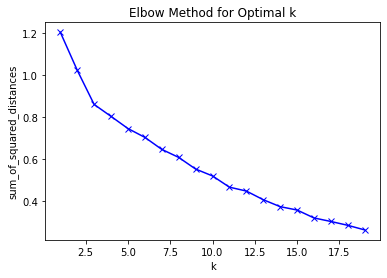

In [34]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k');

### Choosing cluster groups - The Silhouette Method

In [55]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,20)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(manhattan_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(manhattan_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

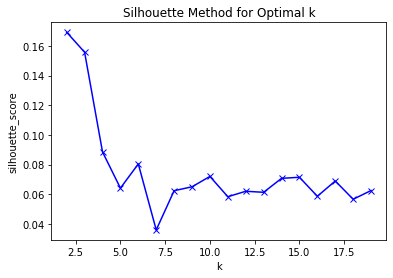

In [56]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method for Optimal k')
plt.show()

### Setting clusters

In [57]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3,
       1, 1, 0, 3, 1, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2], dtype=int32)

In [58]:
# add clustering labels
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, errors='ignore')
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted["Cluster Labels"].round().astype(int)

manhattan_merged = manhattan_location_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Deli / Bodega,Pizza Place,Diner,Steakhouse
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,Bakery,Vietnamese Restaurant,Dumpling Restaurant,Malay Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Deli / Bodega,Pizza Place,Chinese Restaurant,Spanish Restaurant,Bakery
3,Manhattan,Inwood,40.867684,-73.921210,3,Pizza Place,Restaurant,Spanish Restaurant,Café,Mexican Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Deli / Bodega,Pizza Place,Mexican Restaurant,Sandwich Place,Café


In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [65]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
33,Midtown South,Korean Restaurant,Japanese Restaurant,Bakery,Salad Place,American Restaurant


In [61]:
manhattan_cluster_1 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
manhattan_cluster_1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Marble Hill,Sandwich Place,Deli / Bodega,Pizza Place,Diner,Steakhouse
15,Midtown,American Restaurant,Sandwich Place,Japanese Restaurant,Burger Joint,Steakhouse
16,Murray Hill,Sandwich Place,Japanese Restaurant,Mediterranean Restaurant,Sushi Restaurant,American Restaurant
28,Battery Park City,Pizza Place,Italian Restaurant,Food Court,Burger Joint,Mexican Restaurant
29,Financial District,Salad Place,Sandwich Place,Mexican Restaurant,American Restaurant,Café


In [66]:
manhattan_cluster_2 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
manhattan_cluster_2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Upper East Side,Italian Restaurant,American Restaurant,Pizza Place,French Restaurant,Bakery
9,Yorkville,Pizza Place,Italian Restaurant,Deli / Bodega,Sushi Restaurant,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Pizza Place,Burger Joint,Deli / Bodega
12,Upper West Side,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Pizza Place,Bakery
13,Lincoln Square,Food Truck,Café,Italian Restaurant,American Restaurant,French Restaurant
14,Clinton,Italian Restaurant,Deli / Bodega,American Restaurant,Chinese Restaurant,Restaurant
17,Chelsea,Italian Restaurant,American Restaurant,Café,French Restaurant,Japanese Restaurant
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Café,Pizza Place,Chinese Restaurant
21,Tribeca,American Restaurant,Italian Restaurant,Café,Deli / Bodega,Bakery
22,Little Italy,Italian Restaurant,Chinese Restaurant,Café,Bakery,Pizza Place


In [63]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Vietnamese Restaurant,Dumpling Restaurant,Malay Restaurant
2,Washington Heights,Deli / Bodega,Pizza Place,Chinese Restaurant,Spanish Restaurant,Bakery
3,Inwood,Pizza Place,Restaurant,Spanish Restaurant,Café,Mexican Restaurant
4,Hamilton Heights,Deli / Bodega,Pizza Place,Mexican Restaurant,Sandwich Place,Café
5,Manhattanville,Chinese Restaurant,Deli / Bodega,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
6,Central Harlem,Fried Chicken Joint,Deli / Bodega,Pizza Place,Chinese Restaurant,Southern / Soul Food Restaurant
7,East Harlem,Mexican Restaurant,Pizza Place,Latin American Restaurant,Bakery,Deli / Bodega
11,Roosevelt Island,Deli / Bodega,Japanese Restaurant,Greek Restaurant,Sandwich Place,Pizza Place
19,East Village,Pizza Place,Japanese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant
20,Lower East Side,Pizza Place,Deli / Bodega,Chinese Restaurant,Bakery,Mexican Restaurant


In [67]:
manhattan_cluster_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_cluster_merged = manhattan_cluster_merged.join(manhattan_cluster_2.set_index('Neighborhood'), on='Neighborhood').dropna().reset_index(drop=True)

manhattan_cluster_merged


,Neighborhood,Latitude,Longitude,Two-Bedroom Median Rent ($),Median Household Income ($),Income % for Median Rent,Income Required to Lease (40X Rule)($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Carnegie Hill,40.782683,-73.953256,3555.0,155213.0,27.48,142200.0,Pizza Place,Café,Bakery,Sushi Restaurant,Italian Restaurant
1,Chelsea,40.744035,-74.003116,4304.0,101369.0,50.95,172160.0,Italian Restaurant,American Restaurant,Café,French Restaurant,Japanese Restaurant
2,Civic Center,40.715229,-74.005415,4400.0,118931.0,44.40,176000.0,Italian Restaurant,Sandwich Place,French Restaurant,American Restaurant,Indian Restaurant
3,Clinton,40.759101,-73.996119,3600.0,73591.0,58.70,144000.0,Italian Restaurant,Deli / Bodega,American Restaurant,Chinese Restaurant,Restaurant
4,Gramercy,40.737210,-73.981376,3995.0,100900.0,47.51,159800.0,Italian Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Thai Restaurant
5,Hudson Yards,40.756658,-74.000111,4304.0,101369.0,50.95,172160.0,Italian Restaurant,American Restaurant,Café,Deli / Bodega,Thai Restaurant
6,Lenox Hill,40.768113,-73.958860,3395.0,98797.0,41.24,135800.0,Italian Restaurant,Sushi Restaurant,Pizza Place,Burger Joint,Deli / Bodega
7,Lincoln Square,40.773529,-73.985338,5232.5,120337.0,52.18,209300.0,Food Truck,Café,Italian Restaurant,American Restaurant,French Restaurant
8,Little Italy,40.719324,-73.997305,4400.0,118931.0,44.40,176000.0,Italian Restaurant,Chinese Restaurant,Café,Bakery,Pizza Place
9,Soho,40.722184,-74.000657,4400.0,118931.0,44.40,176000.0,Italian Restaurant,Café,French Restaurant,Sandwich Place,Bakery
